In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
target_dir='/media/hdd1/jwolcott/data/dune/nd/nd-lar-reco/train/1file-10k'
csvs=[os.path.join(target_dir,f) for f in os.listdir(target_dir) if f.endswith('.csv')]
dfs=[pd.read_csv(f) for f in csvs]
for idx in np.argsort([df.iter.min() for df in dfs]):
    df=dfs[idx]
    print(csvs[idx],df.iter.min(),'=>',df.iter.max())
df=pd.concat([dfs[idx] for idx in np.argsort([df.iter.min() for df in dfs])])
print(df.keys())

/media/hdd1/jwolcott/data/dune/nd/nd-lar-reco/train/1file-10k/train_log-0000000.csv 0.0 => 9999.0
Index(['iter', 'first_id', 'epoch', 'titer', 'tsumiter', 'tio', 'tsumio',
       'mem', 'ttrain', 'tsave', 'tsumtrain', 'tsumsave', 'accuracy', 'loss',
       'accuracy_class_0', 'accuracy_class_1', 'accuracy_class_2',
       'accuracy_class_3', 'accuracy_class_4', 'ppn_acc', 'ppn_loss',
       'loss_class', 'loss_distance', 'loss_ppn1', 'loss_ppn2', 'acc_ppn1',
       'acc_ppn2', 'fraction_positives_ppn1', 'fraction_positives_ppn2',
       'fraction_negatives_ppn1', 'fraction_negatives_ppn2', 'acc_ppn_type',
       'loss_type', 'num_labels', 'num_discarded_labels_ppn1',
       'num_discarded_labels_ppn2', 'num_positives_ppn1',
       'num_positives_ppn2'],
      dtype='object')


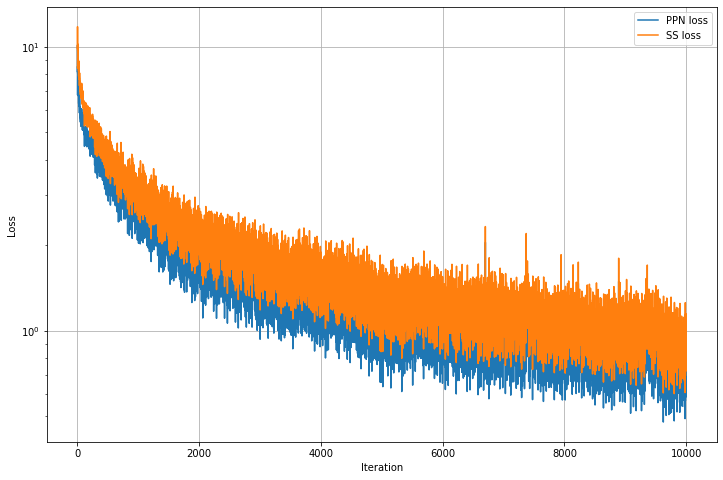

In [9]:
fig,ax=plt.subplots(figsize=(12,8),facecolor='w')
sdf=df
ax.plot(sdf.iter,sdf.ppn_loss, label="PPN loss")
ax.plot(sdf.iter,sdf.loss, label="SS loss")
#ax.plot(sdf.iter,sdf.frag_edge_loss)
#ax.plot(sdf.iter,sdf.frag_node_loss)
ax.set_yscale('log')
#ax.set_ylim(0.01,5.0)
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.legend()
ax.grid(True)
plt.show()

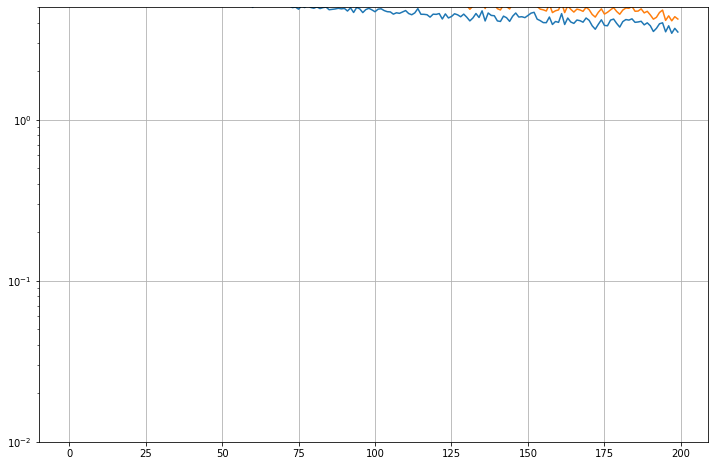

In [4]:


fig,ax=plt.subplots(figsize=(12,8),facecolor='w')
sdf=df.query('iter<15000')
ax.plot(sdf.iter,sdf.ppn_loss)
ax.plot(sdf.iter,sdf.loss)
#ax.plot(sdf.iter,sdf.frag_edge_loss)
#ax.plot(sdf.iter,sdf.frag_node_loss)
ax.set_yscale('log')
ax.set_ylim(0.01,5.0)
ax.grid(True)
plt.show()